In [2]:
%pip install iso3166

In [3]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import iso3166 as iso
from datetime import datetime, timedelta

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
data = pd.read_csv('mission_launches.csv')

In [11]:
data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [12]:
print("The shape of the data:",data.shape) # Gives shape of data

The shape of the data: (4324, 9)


In [15]:
row_count = data.shape[0]  # Gives number of rows
col_count = data.shape[1]  # Gives number of columns
print("In this data, there are",row_count, "rows and",col_count, "columns.")

In this data, there are 4324 rows and 9 columns.


In [16]:
print("The following are the column names in this data:",data.columns)


The following are the column names in this data: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [19]:
#Finding NA values in the data
data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [20]:
#@title #Removing junk values
data.dropna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [26]:
#@title Descriptive Statistics
data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [24]:
data[data["Price"].notna()]["Price"].str.replace(',', '').astype(float).describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

#Figuring out the number of Launches per Company by creating a chart that shows the number of space mission launches by the organization.


<Axes: >

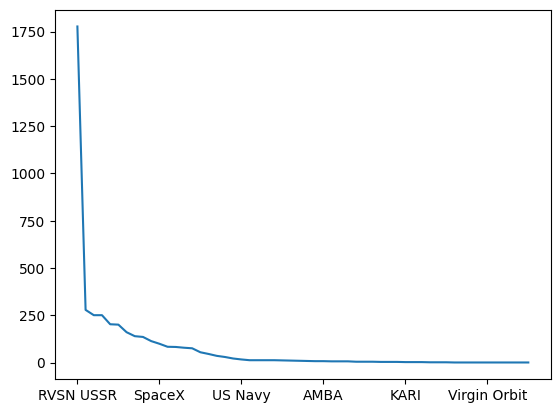

In [25]:
data["Organisation"].value_counts().plot()

<Axes: >

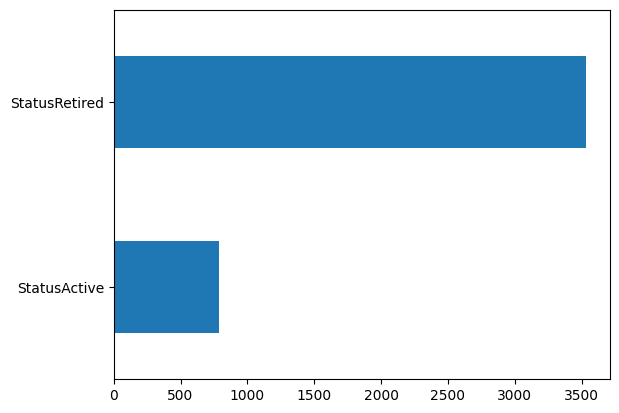

In [27]:
data["Rocket_Status"].value_counts().sort_values().plot(kind="barh")

Distribution of Mission Status

#Distribution of Mission Status


In [28]:
data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [30]:
data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


#Figuring out how Expensive are the Launches by creating a histogram and visualising the distribution.

In [31]:
px.histogram(data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10)


#Using a Choropleth Map to Show the Number of Launches by Country

In [32]:
data["Country"] = data["Location"].str.split(", ").str[-1]

data.loc[(data["Country"] == 'Russia'), "Country"] = "Russian Federation"
data.loc[(data["Country"] == 'New Mexico'), "Country"] = "USA"
data.loc[(data["Country"] == 'Yellow Sea'), "Country"] = "China"
data.loc[(data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
data.loc[(data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
data.loc[(data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
data.loc[(data["Country"] == 'Gran Canaria'), "Country"] = "USA"
data.loc[(data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
data.loc[(data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
data.loc[(data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
data.loc[(data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
data = data.replace({"Country": countries})

launches = data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [33]:
for c in countries:
    print(c)

Afghanistan
Åland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia, Plurinational State of
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cabo Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Congo, Democratic Republic of the
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands (Malvinas)
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
French Southern Territories
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenl

#Using a Choropleth Map to Show the Number of Failures by Country

In [34]:
statuses = data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

<ipython-input-34-e9686188bd4f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#Creating a Plotly Sunburst Chart of the countries, organisations, and mission status.


In [35]:
sunburst = data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

#Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [36]:
money_spent = data[data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()

<ipython-input-36-8d44edc9df01>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


#Analyse the Amount of Money Spent by Organisation per Launch

In [37]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


#Charting the Number of Launches per Year

In [38]:
# Converted the date to the datetime object, then extracted the year from the datetime object.
data['date'] = pd.to_datetime(data['Date'])
data['year'] = data['date'].apply(lambda datetime: datetime.year)
# df_data['year'].head()

# Counted the number of times the same year is mentioned.
ds = data['year'].value_counts().reset_index()
ds.columns = [
    'year',
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds,
    x='year',
    y="count",
    orientation='v',
    title='Missions number by year'
#     width=800
)
fig.show()

#Chart the Number of Launches Month-on-Month until the Present

In [42]:
# Converted the date to the datetime object, then extracted the month from the datetime object.
data['date'] = pd.to_datetime(data['Date'])
data['month'] = data['date'].apply(lambda datetime: datetime.month)
# df_data['month'].head()

# Counted the number of times the same month is mentioned.
ds = data['month'].value_counts().reset_index()
ds.columns = [
    'month',
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds,
    x='month',
    y="count",
    orientation='v',
    title='Missions number by month'
#     width=800
)
fig.show()

print("December has the most launches of all time.")

December has the most launches of all time.


#Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [43]:
# Using max to find the most launches per month
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

# print the month associated with the max value
ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 450


month     12
count    450
dtype: int64

In [44]:
#Using min to find the least launches per month
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

#How has the Launch Price varied Over Time?
Create a line chart that shows the average price of rocket launches over time.

<ipython-input-45-21e7f04683fb>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='year'>

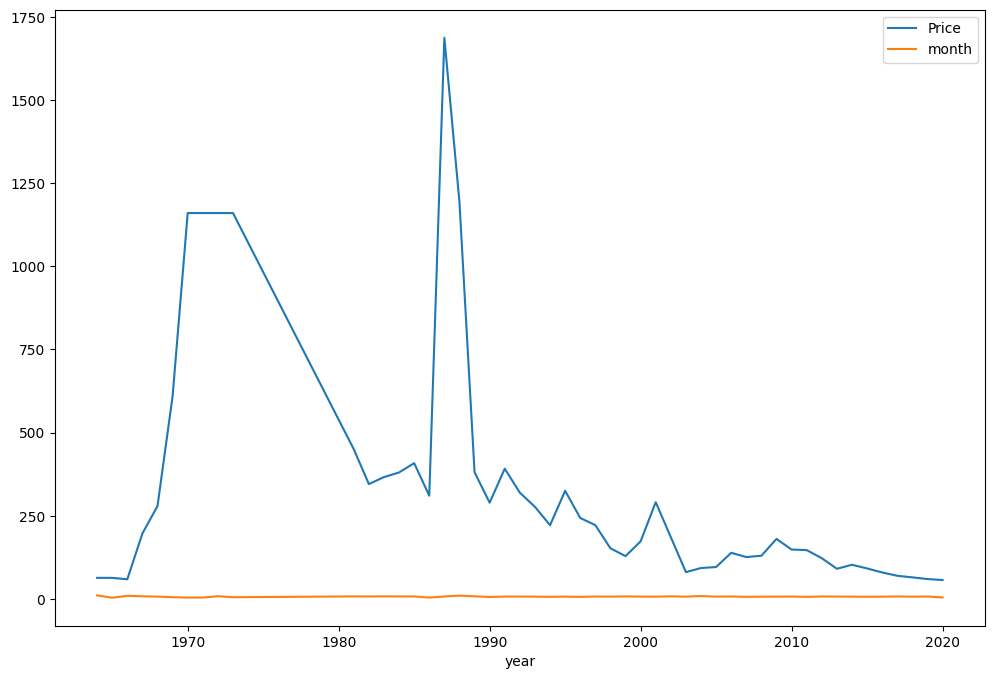

In [45]:
avg_price = data[data["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

avg_price.groupby("year").mean().plot(figsize=(12, 8))

#Chart the Number of Launches over Time by the Top 10 Organisations.
How has the dominance of launches changed over time between the different players?

In [48]:
# Grab data from Organisations and Locations columns
# Sort through data to find the top 10 Organisations
top_10=pd.DataFrame(columns=data.columns)
for val in data.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
  print(val)
  org=data[data.Organisation==val]
  top_10=top_10.append(org,ignore_index=False, verify_integrity=False, sort=None)
top_10

data[data.Organisation=="CASC"]

top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index

print(top_10.shape)


RVSN USSR
Arianespace
General Dynamics
CASC
NASA
VKS RF
US Air Force
ULA
Boeing
Martin Marietta
(3513, 11)


<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

Passing non boolean values for sort is deprecated and will error in a future version!

<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

Passing non boolean values for sort is deprecated and will error in a future version!

<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

Passing non boolean values for sort is deprecated and will error in a future version!

<ipython-input-48-bbc7ff27dbb9>:7: FutureWarning:

The frame.append method i

In [49]:
# Create a chart to display the data
px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation",nbins=10)

#Cold War Space Race: USA vs USSR
The cold war lasted from the start of the dataset up until 1991.

In [50]:
Or_data = data[(data['Country']=='USA') | (data['Country']=='RUS')]
Or_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS,2020-07-30 21:25:00+00:00,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020,7
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,RUS,2020-07-23 14:26:00+00:00,2020,7


In [52]:
# Sort years
cold_war_years = Or_data.sort_values("year")

# Grab years from start of dataset (1964) til 1991
cold_war_years[(cold_war_years.year <= 1991)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957-10-04 19:28:00+00:00,1957,10
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957-11-03 02:30:00+00:00,1957,11
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957-12-06 16:44:00+00:00,1957,12
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958-02-01 03:48:00+00:00,1958,2
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA","Thu Dec 18, 1958 23:02 UTC",SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958-12-18 23:02:00+00:00,1958,12
...,...,...,...,...,...,...,...,...,...,...,...
1755,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 28, 1991 11:33 UTC",Space Shuttle Discovery | STS-39,StatusRetired,450.0,Success,USA,1991-04-28 11:33:00+00:00,1991,4
1754,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Tue May 14, 1991 15:52 UTC",Atlas-E/F Star-37S-ISS | NOAA-D,StatusRetired,NaN,Success,USA,1991-05-14 15:52:00+00:00,1991,5
1753,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Thu May 16, 1991 21:40 UTC",Tsyklon-3 | Cosmos 2143 to 2148,StatusRetired,NaN,Success,RUS,1991-05-16 21:40:00+00:00,1991,5
1762,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri Mar 22, 1991 12:19 UTC",Molniya-M /Block ML | Molniya-3 n†­148,StatusRetired,NaN,Success,RUS,1991-03-22 12:19:00+00:00,1991,3


#Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

In [53]:
# Grab the data for USA and for Russian Federation (aka USSR)
Or_data = data[(data['Country']=='USA') | (data['Country']=='RUS')]
Or_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS,2020-07-30 21:25:00+00:00,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020,7
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,RUS,2020-07-23 14:26:00+00:00,2020,7


In [54]:
# Do not need to count the data - since the pie chart will collect the data per country. However, getting the count will help us to know if the data pulled into the pie chart is accurate.
launches = Or_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

,Country,counts
0,RUS,2099
1,USA,1351


([<matplotlib.patches.Wedge at 0x797ba45aae60>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

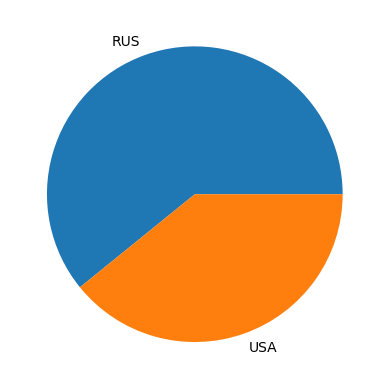

In [55]:
# Plot chart using Country and Mission_Status. When ploting the Mission_Status data will be counted and will return the total number of launches by country
colors = ["#1f77b4", "#ff7f0e"]
grouping = Or_data.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

#Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

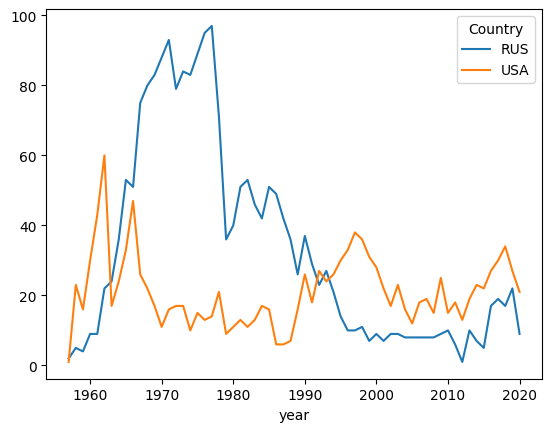

In [56]:
Or_data = data[(data['Country']=='USA') | (data['Country']=='RUS')]
# .size() can be used rather than counts()
Or_data.groupby(["year", "Country"]).size().unstack().plot()

#Chart the Total Number of Mission Failures Year on Year.


In [57]:
Or_data = data[data['Mission_Status'].str.contains("Failure")]
Or_data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,CHN,2020-07-10 04:17:00+00:00,2020,7
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,NZL,2020-07-04 21:19:00+00:00,2020,7
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,2020-05-25 19:50:00+00:00,2020,5
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,2020-04-09 11:46:00+00:00,2020,4
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN,2020-03-16 13:34:00+00:00,2020,3


In [58]:
# How to grab the failures by year from above to use as data points for the chart? Rather than mission status I want failures
yearly_failures = px.data.tips()
fig = px.sunburst(Or_data, path=["year", "Mission_Status"])
fig.show()

#Chart the Percentage of Failures over Time
Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?



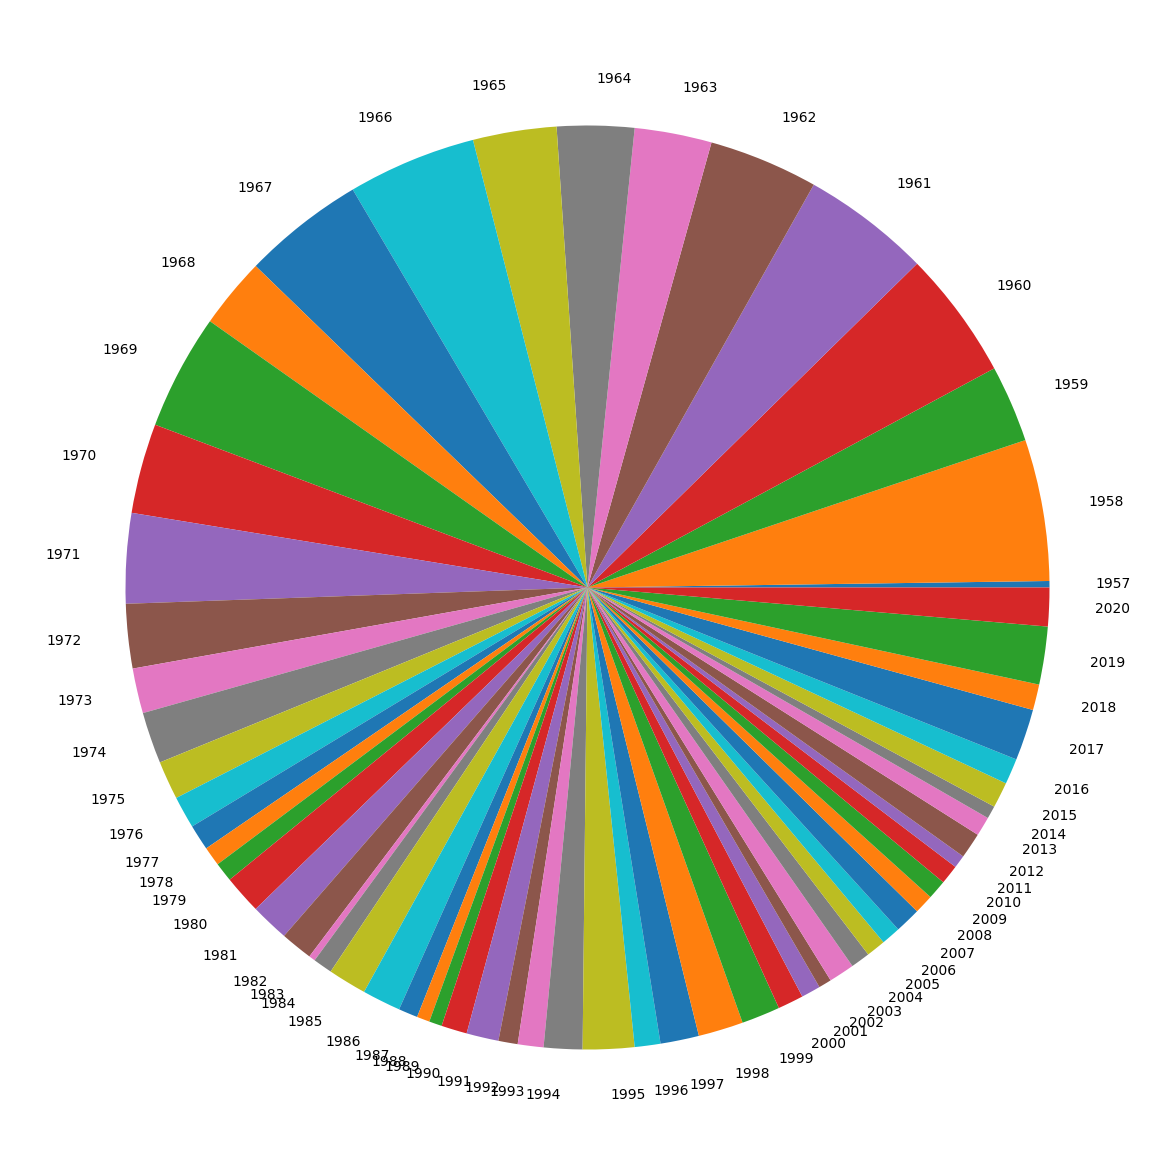

In [59]:
grouping = Or_data.groupby("year").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['year']

plt.pie(sizes, labels = labels)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

#For Every Year Show which Country was in the Lead in terms of Total Number of Launches (up to and including 2020)
Do the results change if we only look at the number of successful launches?

In [62]:
country_launches = data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

# group by year, then by country, then find max count
country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
363,2020,JPN,3
364,2020,NZL,3
365,2020,FRA,2
366,2020,IRN,2
367,2020,ISR,1


In [63]:
country_launches.tail()

,year,Country,counts
363,2020,JPN,3
364,2020,NZL,3
365,2020,FRA,2
366,2020,IRN,2
367,2020,ISR,1


#Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches
Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?


In [64]:
org_launches = data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

# group by year, then by country, then find max count
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()


,year,Organisation,counts
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,US Navy,12
3,1958,AMBA,7
4,1958,RVSN USSR,5


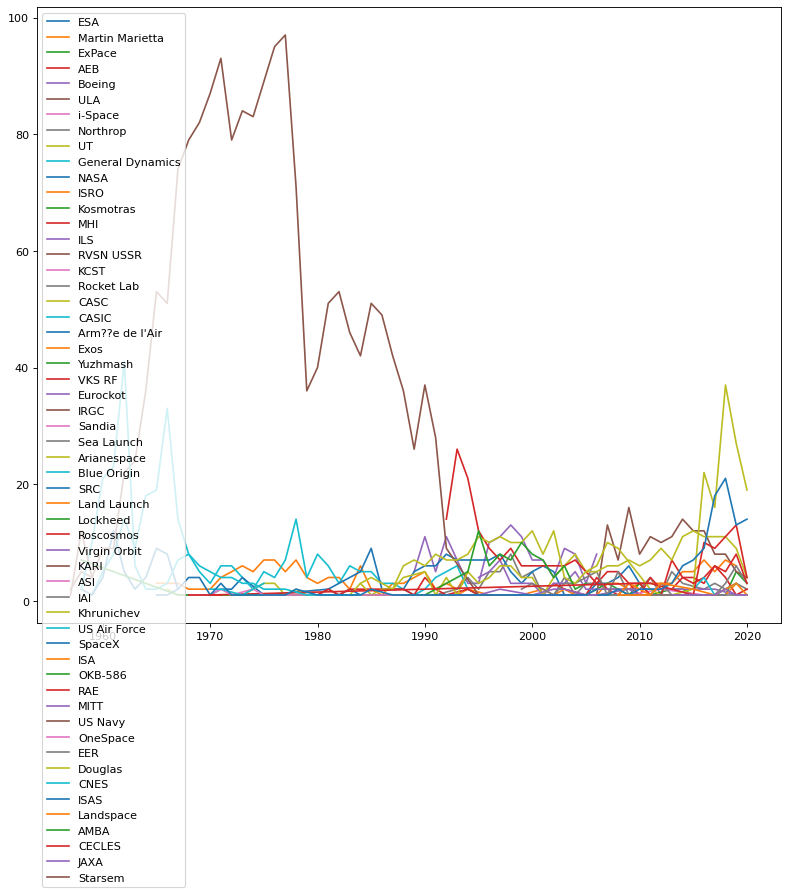

In [65]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)

plt.legend()
plt.show()